In [1]:
#initial import of relevant packages for graphing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#https://stackoverflow.com/questions/32085531/importing-a-csv-file-into-python-to-make-scatterplots-and-histograms

In [2]:
#initial read and print of motifs_dataframe
motifs_df = pd.read_csv("../rosetta_motifs/rmsd_total_best_10.csv")
motifs_df

,system,rmsd,placement_pdb
0,hdac2,0.116899,hdac2_ResPos_22_ResID_MET_Trio17_+_motif_3FL5_...
1,gria2,0.235565,gria2_ResPos_198_ResID_SER_Trio78_+_motif_6CZA...
2,jak2,0.077977,jak2_ResPos_39_ResID_ALA_Trio7_+_motif_3ZBX_6X...
3,fa7,6.339025,fa7_ResPos_41_ResID_HIS_Trio3_+_motif_6T1N_M7Z...
4,rxra,0.449446,rxra_ResPos_21_ResID_ILE_Trio35_+_motif_4RJJ_T...
...,...,...,...
80,esr2,0.320819,esr2_ResPos_180_ResID_LEU_Trio36_+_motif_2MVV_...
81,xiap,5.820211,xiap_ResPos_53_ResID_LEU_Trio22_+_motif_1URE_P...
82,akt2,0.122862,akt2_ResPos_21_ResID_VAL_Trio38_+_motif_3QJ5_0...
83,comt,3.957106,comt_ResPos_186_ResID_GLU_Trio5_+_motif_2LWI_K...


In [3]:
#initial read and print of AutoDock Vina dataframe
ad_df = pd.read_csv("../AutoDock_Vina/ADV_best_rmsds_top_10.csv",header=None)
ad_df

,0,1
0,def,2.772277
1,nram,0.533947
2,fa10,0.398882
3,fak1,0.442263
4,aofb,1.491052
...,...,...
97,aldr,0.526612
98,inha,1.883266
99,pur2,0.755583
100,pgh2,0.636627


In [4]:
#rename autodock columns to be "system" and "rmsd" like with motifs dataframe (initial .csv did not have header line)
ad_df.columns = ['system', 'rmsd']
#test print
ad_df

,system,rmsd
0,def,2.772277
1,nram,0.533947
2,fa10,0.398882
3,fak1,0.442263
4,aofb,1.491052
...,...,...
97,aldr,0.526612
98,inha,1.883266
99,pur2,0.755583
100,pgh2,0.636627


In [5]:
#Inner join of motifs and autodock dataframes for plotting purposes; followed with test print
merged_df = pd.merge(motifs_df, ad_df, on='system', how='inner')
merged_df

,system,rmsd_x,placement_pdb,rmsd_y
0,hdac2,0.116899,hdac2_ResPos_22_ResID_MET_Trio17_+_motif_3FL5_...,0.237670
1,gria2,0.235565,gria2_ResPos_198_ResID_SER_Trio78_+_motif_6CZA...,1.208393
2,jak2,0.077977,jak2_ResPos_39_ResID_ALA_Trio7_+_motif_3ZBX_6X...,0.687935
3,fa7,6.339025,fa7_ResPos_41_ResID_HIS_Trio3_+_motif_6T1N_M7Z...,1.431104
4,rxra,0.449446,rxra_ResPos_21_ResID_ILE_Trio35_+_motif_4RJJ_T...,1.726665
...,...,...,...,...
80,esr2,0.320819,esr2_ResPos_180_ResID_LEU_Trio36_+_motif_2MVV_...,5.809175
81,xiap,5.820211,xiap_ResPos_53_ResID_LEU_Trio22_+_motif_1URE_P...,2.192569
82,akt2,0.122862,akt2_ResPos_21_ResID_VAL_Trio38_+_motif_3QJ5_0...,0.274645
83,comt,3.957106,comt_ResPos_186_ResID_GLU_Trio5_+_motif_2LWI_K...,5.697532


In [6]:
#drop placement_pdb column from motifs dataframe
merged_df = merged_df.drop(columns=['placement_pdb'])
#rename columns for rmsd from motifs and autodock
merged_df.columns = ['system', 'rmsd_motifs', 'rmsd_adv']
#test_print
merged_df

,system,rmsd_motifs,rmsd_adv
0,hdac2,0.116899,0.237670
1,gria2,0.235565,1.208393
2,jak2,0.077977,0.687935
3,fa7,6.339025,1.431104
4,rxra,0.449446,1.726665
...,...,...,...
80,esr2,0.320819,5.809175
81,xiap,5.820211,2.192569
82,akt2,0.122862,0.274645
83,comt,3.957106,5.697532


In [7]:
#initial read and print of Schrodinger Glide dataframe
sg_df = pd.read_csv("../schrodinger_glide/glide_best_rmsd.csv")
sg_df

,system_name,best_rmsd,best_rmsd_pose,total_poses
0,aa2ar,7.927534,13.0,15.0
1,abl1,0.424373,1.0,1.0
2,ace,3.781334,1.0,8.0
3,aces,0.638513,4.0,5.0
4,ada,1.452599,1.0,4.0
...,...,...,...,...
97,tysy,1.925273,4.0,4.0
98,urok,0.849532,1.0,5.0
99,vgfr2,1.357784,2.0,3.0
100,wee1,0.710819,6.0,6.0


In [8]:
#rename schrodinger columns to be 'system', 'rmsd', 'best_pose', 'num_poses' like with motifs dataframe (initial .csv did not have header line)
sg_df.columns = ['system', 'rmsd', 'best_pose', 'num_poses']
#test print
sg_df

,system,rmsd,best_pose,num_poses
0,aa2ar,7.927534,13.0,15.0
1,abl1,0.424373,1.0,1.0
2,ace,3.781334,1.0,8.0
3,aces,0.638513,4.0,5.0
4,ada,1.452599,1.0,4.0
...,...,...,...,...
97,tysy,1.925273,4.0,4.0
98,urok,0.849532,1.0,5.0
99,vgfr2,1.357784,2.0,3.0
100,wee1,0.710819,6.0,6.0


In [9]:
sg_df = sg_df[sg_df['rmsd'].isna() == False]
sg_df

,system,rmsd,best_pose,num_poses
0,aa2ar,7.927534,13.0,15.0
1,abl1,0.424373,1.0,1.0
2,ace,3.781334,1.0,8.0
3,aces,0.638513,4.0,5.0
4,ada,1.452599,1.0,4.0
...,...,...,...,...
97,tysy,1.925273,4.0,4.0
98,urok,0.849532,1.0,5.0
99,vgfr2,1.357784,2.0,3.0
100,wee1,0.710819,6.0,6.0


In [10]:
#Inner join of motifs and shrodinger dataframes for plotting purposes; followed with test print
merged_df = pd.merge(merged_df, sg_df, on='system', how='inner')
merged_df

,system,rmsd_motifs,rmsd_adv,rmsd,best_pose,num_poses
0,hdac2,0.116899,0.237670,5.870451,3.0,6.0
1,gria2,0.235565,1.208393,1.184185,1.0,3.0
2,jak2,0.077977,0.687935,0.954033,5.0,12.0
3,fa7,6.339025,1.431104,1.269014,4.0,11.0
4,rxra,0.449446,1.726665,1.617857,5.0,6.0
...,...,...,...,...,...,...
79,esr2,0.320819,5.809175,1.280179,5.0,8.0
80,xiap,5.820211,2.192569,2.461600,7.0,11.0
81,akt2,0.122862,0.274645,0.843241,1.0,2.0
82,comt,3.957106,5.697532,3.844448,7.0,8.0


In [11]:
#drop non-needed columns from merged dataframe
#merged_df = merged_df.drop(columns=['placement_pdb'])
merged_df = merged_df.drop(columns=['best_pose'])
merged_df = merged_df.drop(columns=['num_poses'])
#rename columns for rmsd from motifs and autodock
merged_df.columns = ['system', 'rmsd_motifs', 'rmsd_adv', 'rmsd_sg']
#test_print
merged_df

,system,rmsd_motifs,rmsd_adv,rmsd_sg
0,hdac2,0.116899,0.237670,5.870451
1,gria2,0.235565,1.208393,1.184185
2,jak2,0.077977,0.687935,0.954033
3,fa7,6.339025,1.431104,1.269014
4,rxra,0.449446,1.726665,1.617857
...,...,...,...,...
79,esr2,0.320819,5.809175,1.280179
80,xiap,5.820211,2.192569,2.461600
81,akt2,0.122862,0.274645,0.843241
82,comt,3.957106,5.697532,3.844448


In [12]:
#read in the Dock 3.7 data
dock_df = pd.read_csv("../dock6/dock6_best_rmsds_top_10.csv")
dock_df

,system,rmsd
0,def,1.091496
1,nram,5.959094
2,fa10,0.180092
3,fak1,0.278123
4,aofb,0.417968
...,...,...
97,aldr,0.527157
98,inha,1.124074
99,pur2,0.610745
100,pgh2,0.233567


In [13]:
#remove any nan
dock_df = dock_df[dock_df['rmsd'].isna() == False]
dock_df

,system,rmsd
0,def,1.091496
1,nram,5.959094
2,fa10,0.180092
3,fak1,0.278123
4,aofb,0.417968
...,...,...
97,aldr,0.527157
98,inha,1.124074
99,pur2,0.610745
100,pgh2,0.233567


In [14]:
#Inner join of motifs and dock dataframes for plotting purposes; followed with test print
merged_df = pd.merge(merged_df, dock_df, on='system', how='inner')
merged_df

,system,rmsd_motifs,rmsd_adv,rmsd_sg,rmsd
0,hdac2,0.116899,0.237670,5.870451,0.360524
1,gria2,0.235565,1.208393,1.184185,7.872376
2,jak2,0.077977,0.687935,0.954033,0.205132
3,fa7,6.339025,1.431104,1.269014,0.204721
4,rxra,0.449446,1.726665,1.617857,0.565159
...,...,...,...,...,...
79,esr2,0.320819,5.809175,1.280179,0.412408
80,xiap,5.820211,2.192569,2.461600,0.507777
81,akt2,0.122862,0.274645,0.843241,0.111405
82,comt,3.957106,5.697532,3.844448,4.422732


In [15]:
#rename column for rmsd from dock
merged_df.columns = ['system', 'rmsd_motifs', 'rmsd_adv', 'rmsd_sg', 'rmsd_dock']
merged_df

,system,rmsd_motifs,rmsd_adv,rmsd_sg,rmsd_dock
0,hdac2,0.116899,0.237670,5.870451,0.360524
1,gria2,0.235565,1.208393,1.184185,7.872376
2,jak2,0.077977,0.687935,0.954033,0.205132
3,fa7,6.339025,1.431104,1.269014,0.204721
4,rxra,0.449446,1.726665,1.617857,0.565159
...,...,...,...,...,...
79,esr2,0.320819,5.809175,1.280179,0.412408
80,xiap,5.820211,2.192569,2.461600,0.507777
81,akt2,0.122862,0.274645,0.843241,0.111405
82,comt,3.957106,5.697532,3.844448,4.422732


In [16]:
#read in the Alphafold3 data
af_df = pd.read_csv("../scripts/alphafold3/best_placements_10_cleaned.csv")
af_df

,system,rmsd
0,aa2ar,1.112620
1,abl1,0.105807
2,ace,0.262542
3,aces,0.125303
4,ada,0.322896
...,...,...
85,tysy,0.843161
86,urok,0.769004
87,vgfr2,0.192072
88,wee1,0.283790


In [17]:
#remove any nan
af_df = af_df[af_df['rmsd'].isna() == False]
af_df

,system,rmsd
0,aa2ar,1.112620
1,abl1,0.105807
2,ace,0.262542
3,aces,0.125303
4,ada,0.322896
...,...,...
85,tysy,0.843161
86,urok,0.769004
87,vgfr2,0.192072
88,wee1,0.283790


In [18]:
#Inner join of motifs and dock dataframes for plotting purposes; followed with test print
merged_df = pd.merge(merged_df, af_df, on='system', how='inner')
merged_df

,system,rmsd_motifs,rmsd_adv,rmsd_sg,rmsd_dock,rmsd
0,hdac2,0.116899,0.237670,5.870451,0.360524,0.166299
1,gria2,0.235565,1.208393,1.184185,7.872376,0.160682
2,jak2,0.077977,0.687935,0.954033,0.205132,0.207115
3,fa7,6.339025,1.431104,1.269014,0.204721,1.206336
4,pa2ga,0.480149,1.618139,5.899041,0.575532,0.311988
...,...,...,...,...,...,...
70,ampc,1.309416,6.130438,7.811795,5.252660,0.949623
71,esr2,0.320819,5.809175,1.280179,0.412408,0.362874
72,xiap,5.820211,2.192569,2.461600,0.507777,0.582890
73,comt,3.957106,5.697532,3.844448,4.422732,0.071296


In [19]:
#rename column for rmsd from dock
merged_df.columns = ['system', 'rmsd_motifs', 'rmsd_adv', 'rmsd_sg', 'rmsd_dock', 'rmsd_alphafold']
merged_df

,system,rmsd_motifs,rmsd_adv,rmsd_sg,rmsd_dock,rmsd_alphafold
0,hdac2,0.116899,0.237670,5.870451,0.360524,0.166299
1,gria2,0.235565,1.208393,1.184185,7.872376,0.160682
2,jak2,0.077977,0.687935,0.954033,0.205132,0.207115
3,fa7,6.339025,1.431104,1.269014,0.204721,1.206336
4,pa2ga,0.480149,1.618139,5.899041,0.575532,0.311988
...,...,...,...,...,...,...
70,ampc,1.309416,6.130438,7.811795,5.252660,0.949623
71,esr2,0.320819,5.809175,1.280179,0.412408,0.362874
72,xiap,5.820211,2.192569,2.461600,0.507777,0.582890
73,comt,3.957106,5.697532,3.844448,4.422732,0.071296


In [20]:
#bin the placements
# Define the bins
bins = [0, 2, 5, 100000]
labels = ['0-2 Å', '2-5 Å', '>5 Å']

In [21]:
# Function to categorize and count occurrences
def categorize_and_count(column):
    
    if column == 'system': return
    
    return pd.cut(merged_df[column], bins=bins, labels=labels, right=False).value_counts().sort_index()

In [22]:
# Apply the function to each column
categorized_counts = pd.DataFrame({col: categorize_and_count(col) for col in merged_df.columns})
print("\nCategorized Counts DataFrame:")
print(categorized_counts)


Categorized Counts DataFrame:
      system  rmsd_motifs  rmsd_adv  rmsd_sg  rmsd_dock  rmsd_alphafold
0-2 Å   None           65        57       48         58              72
2-5 Å   None            5        12       12          7               3
>5 Å    None            5         6       15         10               0


In [23]:
#rename columns
categorized_counts.columns = ['system','Rosetta Motifs', 'AutoDock Vina', 'Schrodinger Glide', 'Dock 3.7', 'Alphafold3']

In [24]:
#drop the system column from catagorized_counts:
categorized_counts = categorized_counts.drop(columns=['system'])

t_categorized_counts = categorized_counts.T
t_categorized_counts

,0-2 Å,2-5 Å,>5 Å
Rosetta Motifs,65,5,5
AutoDock Vina,57,12,6
Schrodinger Glide,48,12,15
Dock 3.7,58,7,10
Alphafold3,72,3,0


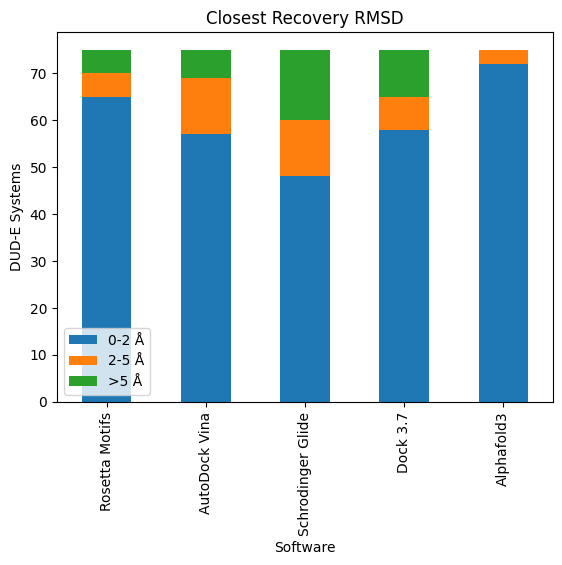

In [25]:
# Plot the data
ax = t_categorized_counts.plot(kind='bar', stacked=True)

# Add labels and title
ax.set_xlabel('Software')
ax.set_ylabel('DUD-E Systems')
ax.set_title('Closest Recovery RMSD')

plt.show()